# Miscellaneous Investigations
for buttoning up issues with the paper, possibly

In [1]:
from src.data.make_dataset import generate_dataset
from src.models.train_model import GridGP

import matplotlib.pyplot as plt
from pathlib import Path

import numpy as np

## Error floor 
Because reconstructions might not always be perfect.

c:\users\roberttk\desktop\slac_ra\machine-learning\ls_be\src\data\make_dataset.py:41: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if xanes == 'trig':


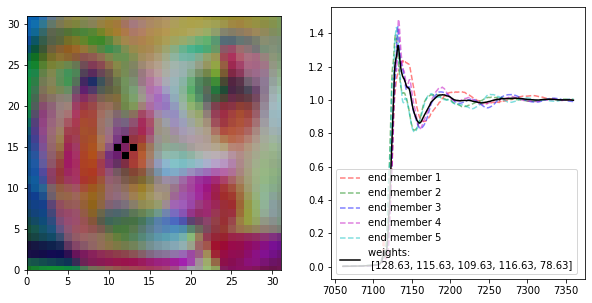

In [2]:
face_image, xanes_data, xanes_energy, xanes_cpts = generate_dataset(n_cpts=5, seed=42, 
                                supply_truth=True, xanes='xanes')
x=12
y=15

fig, axes = plt.subplots(1,2, figsize=(10, 5))
axes[0].imshow(face_image[:, :, :3]/face_image.max()) # Plots in RGB
axes[0].scatter([x, x, x-1, x+1], [y+1, y-1, y, y], marker='s', c='k')
axes[0].set_ylim(0,31)
axes[0].set_xlim(0,31)
# outline around x, y point
axes[1].plot(xanes_energy, xanes_cpts[0], 'r--', label='end member 1', alpha=0.5)
axes[1].plot(xanes_energy, xanes_cpts[1], 'g--', label='end member 2', alpha=0.5)
axes[1].plot(xanes_energy, xanes_cpts[2], 'b--', label='end member 3', alpha=0.5)
axes[1].plot(xanes_energy, xanes_cpts[3], 'm--', label='end member 4', alpha=0.5)
axes[1].plot(xanes_energy, xanes_cpts[4], 'c--', label='end member 5', alpha=0.5)



axes[1].plot(xanes_energy, xanes_data[x*32 + y], 'k', label=f'weights: \n {[round(k,2) for k in face_image[x, y,:]]}')
axes[1].legend()#loc='upper left', bbox_to_anchor=(1.05, 1))

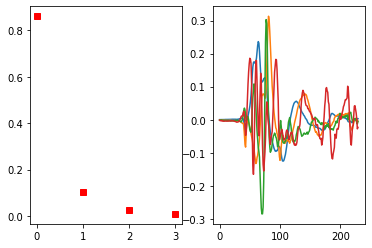

In [3]:
from sklearn.decomposition import PCA
pca_model = PCA(n_components=4)
subset_cpts = pca_model.fit_transform(xanes_data)

fix, axes = plt.subplots(1,2)
axes[0].plot(pca_model.explained_variance_ratio_, 'rs')
axes[1].plot(pca_model.components_.T)

In [13]:
recon_data = pca_model.inverse_transform(subset_cpts)
from sklearn.metrics import mean_squared_error
print(mean_squared_error(xanes_data, recon_data))

spectra_mses = [mean_squared_error(recon_data[i,:], xanes_data[i,:]) 
                                    for i in range(xanes_data.shape[0]) ]
print( np.mean(spectra_mses) )
print(np.std(spectra_mses))

5.362727667108352e-31
5.362727667108352e-31
1.0935634176688992e-32


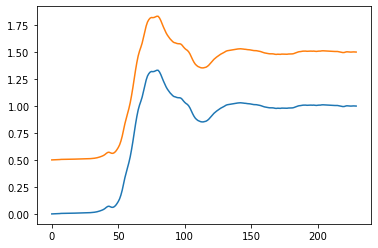

In [7]:
plt.plot(recon_data[0])
plt.plot(xanes_data[0]+0.5)